# Exercise 1

We first load a dataset and examine its dimensions.

In [2]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

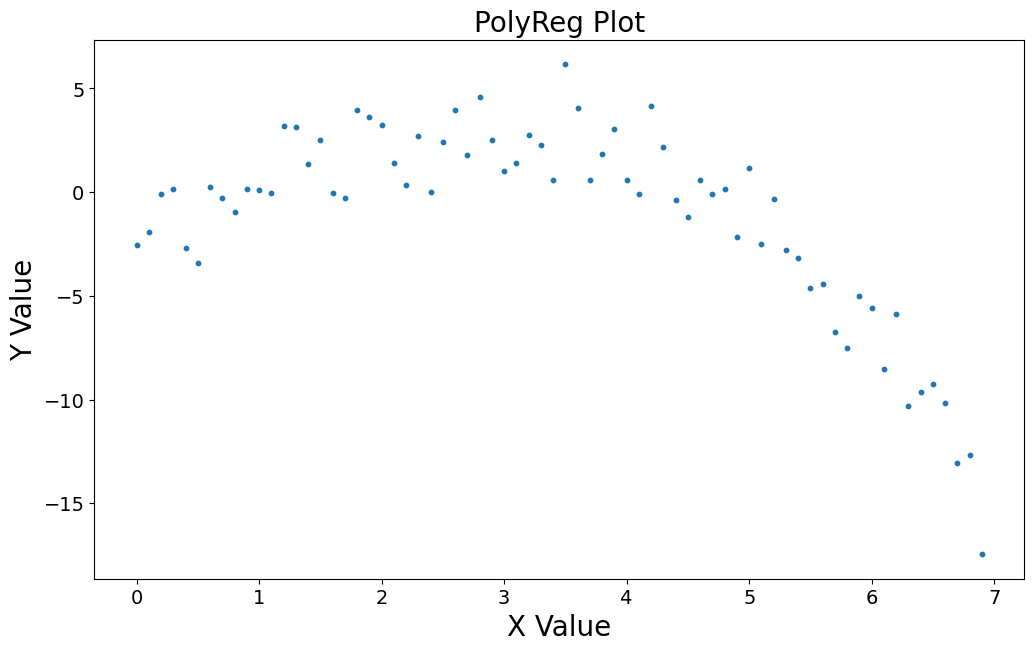

In [9]:
import matplotlib.pyplot as plt
# Your code for scatterplot here

x = xy_data[:,0]
y = xy_data[:, 1]

plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(x, y, s=10)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('PolyReg Plot')
plt.savefig('Ex_1_Plot', bbox_inches = 'tight')
plt.show()


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [31]:
def polyreg(data_matrix, k):
    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
   
    # From data_matrix, extract x and y values
    x_vals = data_matrix[:,0]
    N = len(x_vals)
    y_vals = data_matrix[:, 1]
    Y = y_vals.reshape(-1, 1)
    
    # Check required degree
    
    degree = min(k, N - 1)
    
    # Set up the matrix X
    all_ones = np.ones(np.shape(x_vals))
    X = np.column_stack([x_vals ** i for i in range(degree + 1)])
    
    # Obtain X Transpose
    XT = X.T
    XTY = XT @ Y
    XTX = XT @ X
    
    # Find values for beta coefficients
    beta = np.linalg.inv(XTX) @ XTY
    
    # Output coefficients based on required degree situation
    if k > degree: 
        beta_full = np.vstack([beta, np.zeros((k - degree, 1))])
    else: 
        beta_full = beta
        
    fit = X @ beta
    
    residuals = Y - fit
    
    return beta_full, fit, residuals
    
polyreg(xy_data, 70)

(array([[-2.79164369e+06],
        [ 2.76161807e+06],
        [-1.83785215e+06],
        [ 3.62671213e+05],
        [ 2.24875758e+06],
        [-3.29299349e+06],
        [ 2.06686589e+06],
        [-6.43175370e+05],
        [ 7.28150612e+04],
        [ 9.72364837e+03],
        [-2.45595600e+03],
        [-2.37015983e+02],
        [ 6.10497777e+01],
        [ 7.73732987e+00],
        [-1.57584137e+00],
        [ 1.32175735e-02],
        [-1.74250355e-02],
        [ 1.66924939e-03],
        [ 4.39527966e-04],
        [ 1.65394595e-05],
        [-5.55483129e-06],
        [ 2.05422379e-08],
        [-2.12031084e-07],
        [-5.82626621e-09],
        [ 4.52527491e-09],
        [ 3.61685427e-10],
        [-5.54059952e-11],
        [ 3.63504736e-12],
        [ 5.29396103e-13],
        [-1.17999923e-13],
        [-3.38626833e-14],
        [ 2.50210831e-15],
        [-3.63668277e-16],
        [ 1.08254273e-16],
        [ 4.72455376e-18],
        [-1.06636149e-18],
        [-3.30682447e-19],
 

Use the tests below to check the outputs of the function you have written:

In [32]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

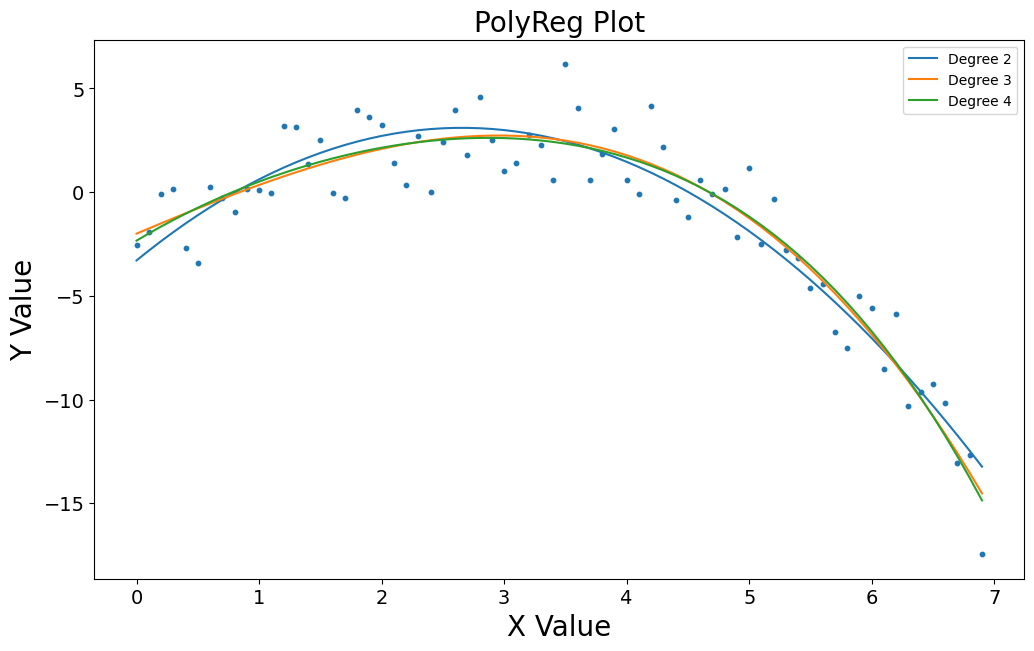

SSE2: 202464.51082965816 	 MSE: 2892.3501547094024 
SSE3: 203848.7762576991 	 MSE3: 2912.125375109987 
SSE4: 203931.2373221416 	 MSE4: 2913.3033903163087 

Optimal Regression: Degree 2


In [38]:
#Your code here
points = xy_data

x_points = xy_data[:,0]
y_points = xy_data[:, 1]

fit2 = polyreg(points, 2)[1]
fit3 = polyreg(points, 3)[1]
fit4 = polyreg(points, 4)[1]

plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(x, y, s=10)
plt.plot(x_points, fit2, label = 'Degree 2')
plt.plot(x_points, fit3, label = 'Degree 3')
plt.plot(x_points, fit4, label = 'Degree 4')

plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('PolyReg Plot')
plt.legend()
plt.savefig('Ex_1_Plot_2', bbox_inches = 'tight')
plt.show()

sse2 = np.linalg.norm(fit2 - y_points) ** 2
sse3 = np.linalg.norm(fit3 - y_points) ** 2
sse4 = np.linalg.norm(fit4 - y_points) ** 2

mse2 = sse2/len(x_points)
mse3 = sse3/len(x_points)
mse4 = sse4/len(x_points)

optimal_regresssion = ''

if min(mse2, mse3, mse4) == mse2:
    optimal_regression = "Degree 2"
elif min(mse2, mse3, mse4) == mse3: 
    optimal_regression = "Degree 3"
else:
    optimal_regression = "Degree 4"

print(f"SSE2: {sse2} \t MSE: {mse2} \nSSE3: {sse3} \t MSE3: {mse3} \nSSE4: {sse4} \t MSE4: {mse4} \n")
print(f"Optimal Regression: {optimal_regression}")

 #### State which model you choose and briefly justify your choice.
 
 
I chose the Second Degree Regression as it has the lowest MSE. 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

/var/folders/c1/ld00hddd6qv__2_ls21p33040000gn/T/ipykernel_31521/3775893267.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


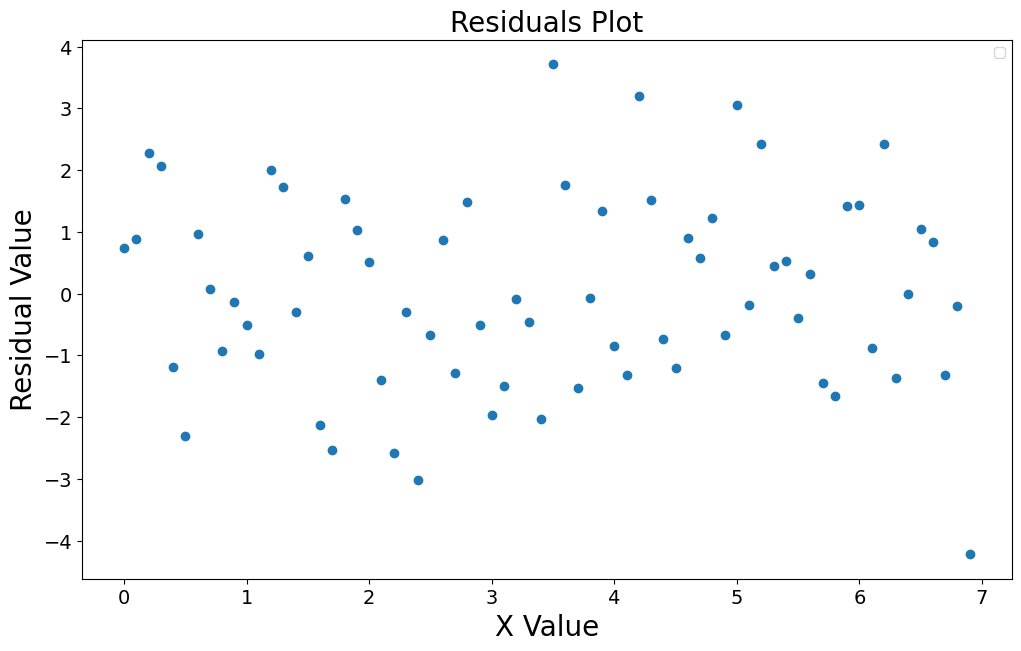

/var/folders/c1/ld00hddd6qv__2_ls21p33040000gn/T/ipykernel_31521/3775893267.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


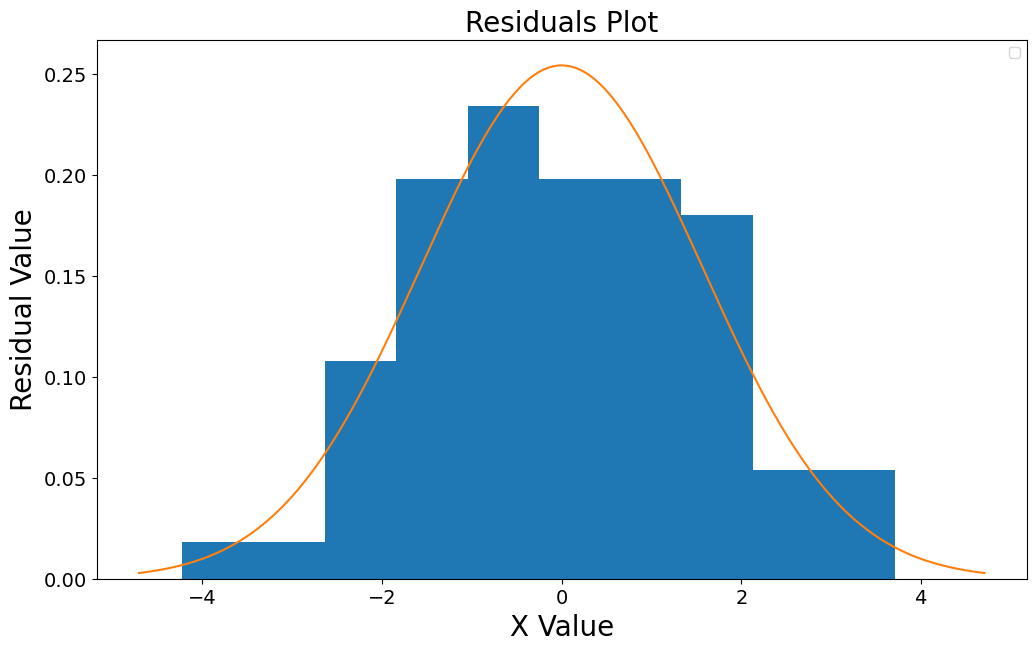

In [50]:
#Your code here

from scipy.stats import norm

residuals = polyreg(xy_data, 2)[2]

sd = np.std(residuals)

plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(x_points, residuals)

plt.xlabel('X Value')
plt.ylabel('Residual Value')
plt.title('Residuals Scatter Plot')
plt.legend()
plt.savefig('Ex_1_Plot_3', bbox_inches = 'tight')
plt.show()

plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

xaxis = np.linspace(-3*sd,3*sd,1000)
pdf = norm.pdf(xaxis, loc=0, scale=sd)
plt.hist(residuals, density = True)
plt.plot(xaxis, pdf)

plt.xlabel('X Value')
plt.ylabel('Residual Value')
plt.title('Residuals Histogram')
plt.legend()
plt.savefig('Ex_1_Plot_4', bbox_inches = 'tight')
plt.show()